# T4 FOXSI2 - Ghost Rays from all posible sources
## April 2020
## Milo BC - Berkeley

In [6]:
'''
------------------------------------------------
            LOAD AND PLOT RAYS
------------------------------------------------
'''

from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap 
import numpy as np
import astropy.io.fits as pyfits
from glob import glob

# Parameters
Dir = './D6_rays/'
Dang = [-82.5000, -75.0000, 67.5000, 75.0000, -97.5000, -90.0000, 60.0000]  ## Detector angles
T4x, T4y = 200, 750    # Target center
sim_scale = 1031.328   # 1cm = 1031.328 arcsec
#sim_scale = 17.18880   # 1cm = 17.4 arcmin
Xmask, Ymask = -240, 360

def readrays(file):
    # load rays
    Rays = load_rays(file)
    # fix a small bug
    for r in Rays:
        r.hist = r.hist.tolist()
    # Create detector :
    detector = Detector(width=40,
                        height=40,
                        normal = [0,0,1],
                        center = [0,0,230], # f-distance + segment lenght
                        reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Rays)
    # Select D, H, and P rays
    Drays = [r for r in Rays if (r.des[2]==230 and r.bounces ==2 )]
    Srays = [r for r in Rays if (r.des[2]==230 and r.bounces ==1 )]
    Hrays = [r for r in Rays if (r.des[2]==230 and r.bounces ==1 and r.tag[-4:] == 'Hy-D' )]
    Prays = [r for r in Rays if (r.des[2]==230 and r.bounces ==1 and r.tag[-4:] == 'Pa-D' )]
    # Define initial void lists to store rays to return
    All_Hx, All_Hy, All_Px, All_Py, All_Dx, All_Dy = [], [], [], [], [], []    
    #Hyperboloid
    Hx, Hy = [], []
    for r in Hrays:
        Hx.append(r.pos[0]*sim_scale + T4x)
        Hy.append(r.pos[1]*sim_scale + T4y)
    All_Hx.append(Hx)
    All_Hy.append(Hy)
    # Paraboloid
    Px, Py = [], []
    for r in Prays:
        Px.append(r.pos[0]*sim_scale + T4x)
        Py.append(r.pos[1]*sim_scale + T4y)
    All_Px.append(Px)
    All_Py.append(Py)
    # Double
    Dx, Dy = [], []
    for r in Drays:
        Dx.append(r.pos[0]*sim_scale + T4x)
        Dy.append(r.pos[1]*sim_scale + T4y)
    All_Dx.append(Dx)
    All_Dy.append(Dy)
    
    return All_Hx, All_Hy, All_Px, All_Py, All_Dx, All_Dy

Rays from ./D6_rays/D6_S1.csv loaded.
reading ./D6_rays/D6_S1.csv
Rays from ./D6_rays/D6_S2.csv loaded.
reading ./D6_rays/D6_S2.csv
Rays from ./D6_rays/D6_S3.csv loaded.
reading ./D6_rays/D6_S3.csv
Rays from ./D6_rays/D6_S4.csv loaded.
reading ./D6_rays/D6_S4.csv
Rays from ./D6_rays/D6_S5.csv loaded.
reading ./D6_rays/D6_S5.csv


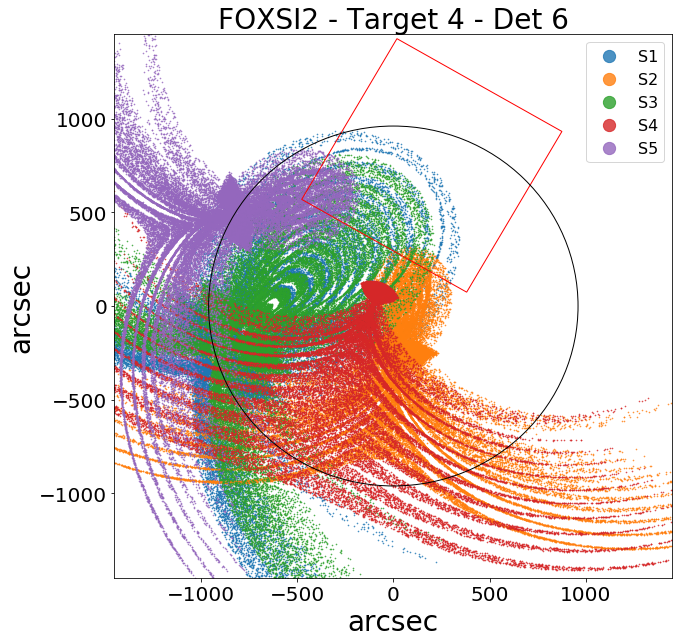

In [2]:
# Plotting
tabcolors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
fig, ax = plt.subplots(figsize=(10,10))
# ornaments
ax.set_xlim(-1450,1450)
ax.set_ylim(-1450,1450)
ax.set_xlabel('arcsec',fontsize=28)
ax.set_ylabel('arcsec',fontsize=28)
ax.tick_params(axis='both', labelsize=20)
ax.set_title('FOXSI2 - Target 4 - Det 6',fontsize=28)
# sources:
for tc, source in zip(tabcolors, sorted(glob(Dir+'*.csv'))):
    S_Hx, S_Hy, S_Px, S_Py, S_Dx, S_Dy = readrays(source) # Read Rays
    print('reading '+source)
    ax.scatter(S_Hx,S_Hy,color=tc,s=.4,alpha=0.8,label=source[-6:-4])
    ax.scatter(S_Px,S_Py,color=tc,s=.4,alpha=0.8)
    ax.scatter(S_Dx,S_Dy,color=tc,s=.4,alpha=0.8)
# D6 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[6]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[6]-135)) + 1)
rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[6],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
circ = patches.Circle((0,0),radius= 960,fill=False);ax.add_patch(circ)
# legend
lgnd = ax.legend(loc='upper right',scatterpoints=1, fontsize=16)
lgnd.legendHandles[0]._sizes = [150]
lgnd.legendHandles[1]._sizes = [150]
lgnd.legendHandles[2]._sizes = [150]
lgnd.legendHandles[3]._sizes = [150]
lgnd.legendHandles[4]._sizes = [150]
plt.show()
fig.savefig('SourcesT4.png',bbox_inches='tight',dpi=300)
plt.close(fig)

# Define circle that map out ghost rays

# D6

Rays from ./D6_rays/D6_S1.csv loaded.


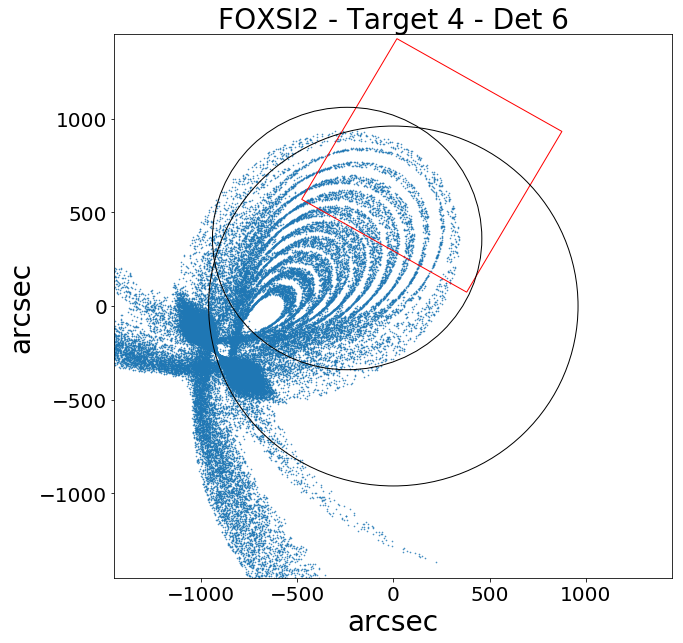

In [4]:
# Plotting
tc = 'tab:blue'
fig, ax = plt.subplots(figsize=(10,10))
# ornaments
ax.set_xlim(-1450,1450)
ax.set_ylim(-1450,1450)
ax.set_xlabel('arcsec',fontsize=28)
ax.set_ylabel('arcsec',fontsize=28)
ax.tick_params(axis='both', labelsize=20)
ax.set_title('FOXSI2 - Target 4 - Det 6',fontsize=28)
# sources:
source = Dir+'D6_S1.csv'
S_Hx, S_Hy, S_Px, S_Py, S_Dx, S_Dy = readrays(source) # Read Rays
ax.scatter(S_Hx,S_Hy,color=tc,s=.4,alpha=0.8,label=source[-6:-4])
ax.scatter(S_Px,S_Py,color=tc,s=.4,alpha=0.8)
ax.scatter(S_Dx,S_Dy,color=tc,s=.4,alpha=0.8)
# D6 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[6]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[6]-135)) + 1)
rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[6],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
solardisk = patches.Circle((0,0),radius= 960,fill=False);ax.add_patch(solardisk)
circ = patches.Circle((Xmask,Ymask),radius= 700,fill=False);ax.add_patch(circ)
plt.show()
fig.savefig('SourcesT4D6.png',bbox_inches='tight',dpi=300)
plt.close(fig)

# D0145

Rays from ./D0145_rays/D0145S1.csv loaded.


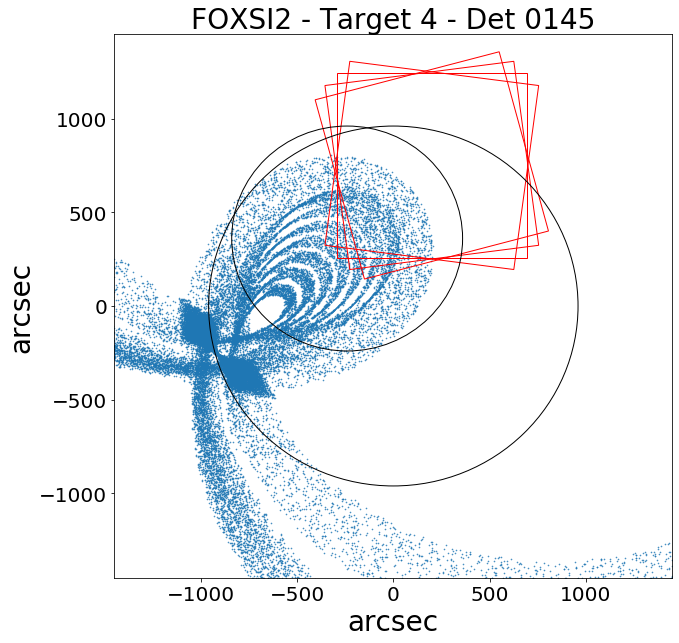

In [4]:
# Plotting
tc = 'tab:blue'
fig, ax = plt.subplots(figsize=(10,10))
# ornaments
ax.set_xlim(-1450,1450)
ax.set_ylim(-1450,1450)
ax.set_xlabel('arcsec',fontsize=28)
ax.set_ylabel('arcsec',fontsize=28)
ax.tick_params(axis='both', labelsize=20)
ax.set_title('FOXSI2 - Target 4 - Det 0145',fontsize=28)
# sources:
Dir = './D0145_rays/'
source = Dir+'D0145S1.csv'
S_Hx, S_Hy, S_Px, S_Py, S_Dx, S_Dy = readrays(source) # Read Rays
ax.scatter(S_Hx,S_Hy,color=tc,s=.4,alpha=0.8,label=source[-6:-4])
ax.scatter(S_Px,S_Py,color=tc,s=.4,alpha=0.8)
ax.scatter(S_Dx,S_Dy,color=tc,s=.4,alpha=0.8)
# D6 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[0]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[0]-135)) + 1)
rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[0],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[1]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[1]-135)) + 1)
rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[1],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[4]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[4]-135)) + 1)
rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[4],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[5]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[5]-135)) + 1)
rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[5],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
solardisk = patches.Circle((0,0),radius= 960,fill=False);ax.add_patch(solardisk)
circ = patches.Circle((Xmask,Ymask),radius= 600,fill=False);ax.add_patch(circ)
plt.show()
fig.savefig('SourcesT4.png',bbox_inches='tight',dpi=300)
plt.close(fig)

# Handling IDL SAV files 
### [FOXSI2 T4 D6]

In [80]:
from scipy.io import readsav
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
det = 6
DataDir = './DataFOXSI2/'
offset_xy = [360., -180.]
T4x, T4y = 200, 750
Dang = [-82.5000, -75.0000, 67.5000, 75.0000, -97.5000, -90.0000, 60.0000]  ## Detector angles
tlaunch = 69060.
Erange = [5, 10] # maximize the amount of counts we got
#Erange = [6, 12] # to be consistent with Hannah et al. (2007, 2010)
thr_n = 4.
R10s = 700
#R10s = 600
R07s = 500

def All_Data(datafile,Erange,Trange):
    ''' return all data - Good and No Good - '''
    # Read SAV LEV2 data : 
    data_lvl2_d6 = readsav(DataDir+datafile)[datafile[:-4]]
    # Energy selection :
    data_lvl2_d6_E = data_lvl2_d6[(np.stack(data_lvl2_d6['HIT_ENERGY']).T[1] > Erange[0]) &
                                  (np.stack(data_lvl2_d6['HIT_ENERGY']).T[1] < Erange[1]) &
                                  (np.stack(data_lvl2_d6['HIT_ENERGY']).T[0] > thr_n)]
    # Time selection :
    data_lvl2_d6_ET = data_lvl2_d6_E[(data_lvl2_d6_E['wsmr_time'] > Trange[0]) & 
                                    (data_lvl2_d6_E['wsmr_time'] < Trange[1])]
    return data_lvl2_d6_ET

def Good_Data(datafile,Erange,Trange):
    # Read SAV LEV2 data : 
    data_lvl2_d6 = readsav(DataDir+datafile)[datafile[:-4]]
    # Energy selection :
    data_lvl2_d6_E = data_lvl2_d6[(np.stack(data_lvl2_d6['HIT_ENERGY']).T[1] > Erange[0]) &
                                  (np.stack(data_lvl2_d6['HIT_ENERGY']).T[1] < Erange[1]) &
                                  (np.stack(data_lvl2_d6['HIT_ENERGY']).T[0] > thr_n)]
    # Time selection :
    data_lvl2_d6_ET = data_lvl2_d6_E[(data_lvl2_d6_E['wsmr_time'] > Trange[0]) & 
                                    (data_lvl2_d6_E['wsmr_time'] < Trange[1])]
    # Good_Data selection :
    data_lvl2_d6_ET_noerr = data_lvl2_d6_ET[data_lvl2_d6_ET['ERROR_FLAG']==0]
    return data_lvl2_d6_ET_noerr

def plotdata(FXDX, det):
    fig, ax = plt.subplots(figsize=(10,10))
    # ornaments
    ax.set_xlim(-1450,1450)
    ax.set_ylim(-1450,1450)
    ax.set_xlabel('arcsec',fontsize=28)
    ax.set_ylabel('arcsec',fontsize=28)
    ax.tick_params(axis='both', labelsize=20)
    ax.set_title('FOXSI2 - Target 4 - Det '+str(det),fontsize=28)
    # FOXSI2 Data
    ax.scatter(np.stack(FXDX['HIT_XY_SOLAR']).T[0] + offset_xy[0],
               np.stack(FXDX['HIT_XY_SOLAR']).T[1]+ offset_xy[1],
               marker='o',color='black',alpha=0.4)
    # D6 - Si
    l = 990
    mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[det]-45)) + 1)
    my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[det]-135)) + 1)
    rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[det],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    solardisk = patches.Circle((0,0),radius= 960,fill=False);ax.add_patch(solardisk)
    r = (R10s if det == 6 else R07s)
    circ = patches.Circle((Xmask,Ymask),radius= r,fill=False);ax.add_patch(circ)
    plt.show()
    fig.savefig('F2T4D'+str(det)+'S.png',bbox_inches='tight',dpi=300)
    plt.close(fig)

def plotspect(FXDX):
    es = np.stack(FXDX['hit_energy']).T[1] # get energy values
    det = FXDX['det_num'][0]
    # plot spectrum
    fig, ax = plt.subplots(figsize=(8,6))
    # ornaments
    ax.set_xlim(4,11)
    ax.set_ylim(0,1)
    ax.set_xlabel('Energy [keV]',fontsize=28)
    ax.set_yticks([])
    ax.tick_params(axis='x', labelsize=20)
    ax.set_title('FOXSI2 - Target 4 - Det '+str(det),fontsize=28)
    ax.axvspan(5, 10, alpha=0.2, color='grey')
    # FOXSI2 Data
    ax.scatter(es, np.ones_like(es)*.5,s=250, c='grey', marker='o',alpha=0.7)
    ax.vlines(es,ymin=0,ymax=1,color='grey',linestyles='dashed')
    plt.show()
    fig.savefig('F2T4D'+str(det)+'_Spec.pdf',bbox_inches='tight',dpi=300)
    plt.close(fig)

def plothist(FXDX):
    barwidth, emin, emax = 0.5, 5, 10
    es = np.stack(FXDX['hit_energy']).T[1] # get energy values
    y,binEdges = np.histogram(es,bins=int((emax-emin)/barwidth),range=(emin,emax))
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    menStd     = np.sqrt(y)
    det = FXDX['det_num'][0]
    # plot spectrum
    fig, ax = plt.subplots(figsize=(8,6))
    # ornaments
    ax.set_xlim(4,11)
    ax.set_xlabel('Energy [keV]',fontsize=28)
    ax.set_ylabel('Counts',fontsize=28)
    #ax.set_yticks([])
    ax.tick_params(axis='both', labelsize=20)
    ax.set_title('FOXSI2 - Target 4 - Det '+str(det),fontsize=28)
    ax.axvspan(emin, emax, alpha=0.2, color='grey')
    # FOXSI2 Data
    plt.bar(bincenters, y, width=barwidth, color='grey', yerr=menStd)
    plt.show()
    fig.savefig('F2T4D'+str(det)+'_Hist.pdf',bbox_inches='tight',dpi=300)
    plt.close(fig)

In [19]:
barwidth, emin, emax = 0.5, 5, 10
int((emax - emin)/barwidth) + 1

11

In [2]:
# Defining times:
t4_start = 373.5
t4_end   = 466.2
t_shtr_start = 438.0 #+ 4. # add +4sec to test background
t_shtr_end   = 442.0
Trange6 = np.array((t4_start, t4_end)) + tlaunch
Trange0145 = np.array((t4_start, t_shtr_start)) + tlaunch
Trangeshtr = np.array((t_shtr_start, t4_end)) + tlaunch

In [3]:
# Loading FOXSI2 Data - ONLY GOOD DATA - :
# 10-shell
F2D6 = Good_Data('data_lvl2_d6.sav',Erange,Trange6)
# 7-shell
F2D5 = Good_Data('data_lvl2_d5.sav',Erange,Trange0145)
F2D4 = Good_Data('data_lvl2_d4.sav',Erange,Trange0145)
F2D1 = Good_Data('data_lvl2_d1.sav',Erange,Trange0145)
F2D0 = Good_Data('data_lvl2_d0.sav',Erange,Trange0145)
# shutter
F2D5S = Good_Data('data_lvl2_d5.sav',Erange,Trangeshtr)
F2D4S = Good_Data('data_lvl2_d4.sav',Erange,Trangeshtr)
F2D1S = Good_Data('data_lvl2_d1.sav',Erange,Trangeshtr)
F2D0S = Good_Data('data_lvl2_d0.sav',Erange,Trangeshtr)

In [4]:
# Loading FOXSI2 Data - ALL DATA - :
# NEEDED only for LIFETIME estimate purposes
# 10-shell
F2D6_All = All_Data('data_lvl2_d6.sav',Erange,Trange6)
# 7-shell
F2D5_All = All_Data('data_lvl2_d5.sav',Erange,Trange0145)
F2D4_All = All_Data('data_lvl2_d4.sav',Erange,Trange0145)
F2D1_All = All_Data('data_lvl2_d1.sav',Erange,Trange0145)
F2D0_All = All_Data('data_lvl2_d0.sav',Erange,Trange0145)
# shutter
F2D5S_All = All_Data('data_lvl2_d5.sav',Erange,Trangeshtr)
F2D4S_All = All_Data('data_lvl2_d4.sav',Erange,Trangeshtr)
F2D1S_All = All_Data('data_lvl2_d1.sav',Erange,Trangeshtr)
F2D0S_All = All_Data('data_lvl2_d0.sav',Erange,Trangeshtr)

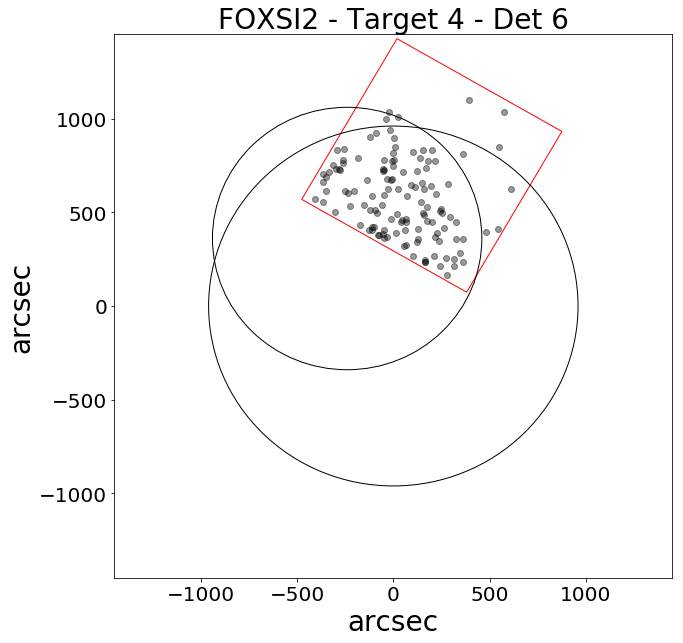

In [12]:
plotdata(F2D6,6)

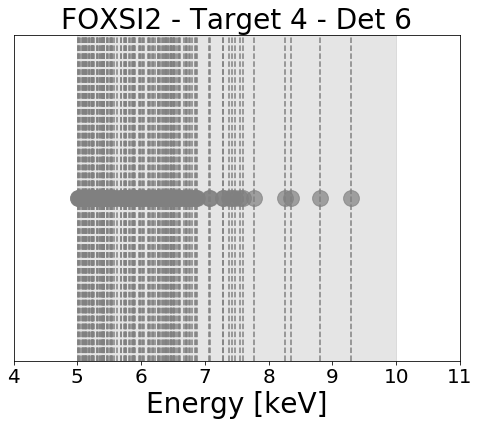

In [13]:
plotspect(F2D6)

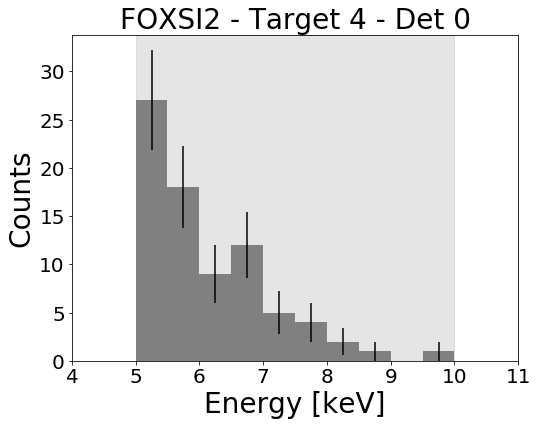

In [85]:
plothist(F2D0)

# Finding areas of interest

In [15]:
Rmask = (R10s if det == 6 else R07s)
def DetArea(det, N) :
    lsi = 990 # length of Silicon Detector in arcsec
    # create an initial meshgrid with the size of the Si det :
    Xi, Yi = np.meshgrid(np.linspace(-.5*lsi, .5*lsi, N+1), np.linspace(-.5*lsi, .5*lsi, N+1))
    # rotate and translate :
    Xrt   =  np.cos(np.deg2rad(Dang[det]))*Xi - np.sin(np.deg2rad(Dang[det]))*Yi + T4x
    Yrt   =  np.sin(np.deg2rad(Dang[det]))*Xi + np.cos(np.deg2rad(Dang[det]))*Yi + T4y
    return Xrt, Yrt

In [16]:
Det6Area = DetArea(6, 30)

In [17]:
# Dots inside solar disk
Xin = Det6Area[0][np.sqrt(Det6Area[0]**2 + Det6Area[1]**2) < 960 ]
Yin = Det6Area[1][np.sqrt(Det6Area[0]**2 + Det6Area[1]**2) < 960 ]

In [18]:
# Dots outside the ghost rays circle
Xnogr = Xin[np.sqrt((Xin - Xmask )**2 + (Yin - Ymask)**2) > Rmask]
Ynogr = Yin[np.sqrt((Xin - Xmask )**2 + (Yin - Ymask)**2) > Rmask]

In [19]:
# Dots outside solar disk
Xout = Det6Area[0][(np.sqrt(Det6Area[0]**2 + Det6Area[1]**2) > 960) &
                   (np.sqrt((Det6Area[0] - Xmask )**2 + (Det6Area[1] - Ymask)**2) > R10s)]
Yout = Det6Area[1][(np.sqrt(Det6Area[0]**2 + Det6Area[1]**2) > 960) &
                   (np.sqrt((Det6Area[0] - Xmask )**2 + (Det6Area[1] - Ymask)**2) > R10s)]

In [20]:
# Dots inside the ghost rays circle
Xgr = Xin[np.sqrt((Xin - Xmask )**2 + (Yin - Ymask)**2) < R10s]
Ygr = Yin[np.sqrt((Xin - Xmask )**2 + (Yin - Ymask)**2) < R10s]

In [21]:
# Color code FOXSI-2 Data (GOOD) :
FX = np.stack(F2D6['HIT_XY_SOLAR']).T[0] + offset_xy[0]
FY = np.stack(F2D6['HIT_XY_SOLAR']).T[1]+ offset_xy[1]
EE = np.stack(F2D6['HIT_ENERGY']).T[1]
# FOXSI-2 Data inside solar disk
FXin = FX[(np.sqrt(FX**2 + FY**2) < 960) &
          (np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) > Rmask)]
FYin = FY[(np.sqrt(FX**2 + FY**2) < 960) &
          (np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) > Rmask)]
EEin = EE[(np.sqrt(FX**2 + FY**2) < 960) &
          (np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) > Rmask)]
# FOXSI-2 Data outside solar disk
FXout = FX[(np.sqrt(FX**2 + FY**2) > 960) &
          (np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) > Rmask)]
FYout = FY[(np.sqrt(FX**2 + FY**2) > 960) &
          (np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) > Rmask)]
EEout = EE[(np.sqrt(FX**2 + FY**2) > 960) &
          (np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) > Rmask)]
# FOXSI-2 Data inside Ghost Ray disk
FXgr = FX[(np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) < Rmask)]
FYgr = FY[(np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) < Rmask)]
EEgr = EE[(np.sqrt((FX - Xmask )**2 + (FY - Ymask)**2) < Rmask)]

#### Lifetime estimates

In [17]:
# Color code FOXSI-2 Data (ALL) :
FX_All = np.stack(F2D6_All['HIT_XY_SOLAR']).T[0] + offset_xy[0]
FY_All = np.stack(F2D6_All['HIT_XY_SOLAR']).T[1]+ offset_xy[1]
# FOXSI-2 Data inside solar disk
FXin_All = FX_All[(np.sqrt(FX_All**2 + FY_All**2) < 960) &
          (np.sqrt((FX_All - Xmask )**2 + (FY_All - Ymask)**2) > Rmask)]
FYin_All = FY_All[(np.sqrt(FX_All**2 + FY_All**2) < 960) &
          (np.sqrt((FX_All - Xmask )**2 + (FY_All - Ymask)**2) > Rmask)]
# FOXSI-2 Data outside solar disk
FXout_All = FX_All[(np.sqrt(FX_All**2 + FY_All**2) > 960) &
          (np.sqrt((FX_All - Xmask )**2 + (FY_All - Ymask)**2) > Rmask)]
FYout_All = FY_All[(np.sqrt(FX_All**2 + FY_All**2) > 960) &
          (np.sqrt((FX_All - Xmask )**2 + (FY_All - Ymask)**2) > Rmask)]
print('Lifetime inside = {0}/{1} = {2} [green]'.format(FXin.size,FXin_All.size,round(FXin.size/FXin_All.size,3)))
print('Lifetime outside = {0}/{1} = {2} [blue]'.format(FXout.size,FXout_All.size,round(FXout.size/FXout_All.size,3)))

Lifetime inside = 4/23 = 0.174 [green]
Lifetime outside = 4/11 = 0.364 [blue]


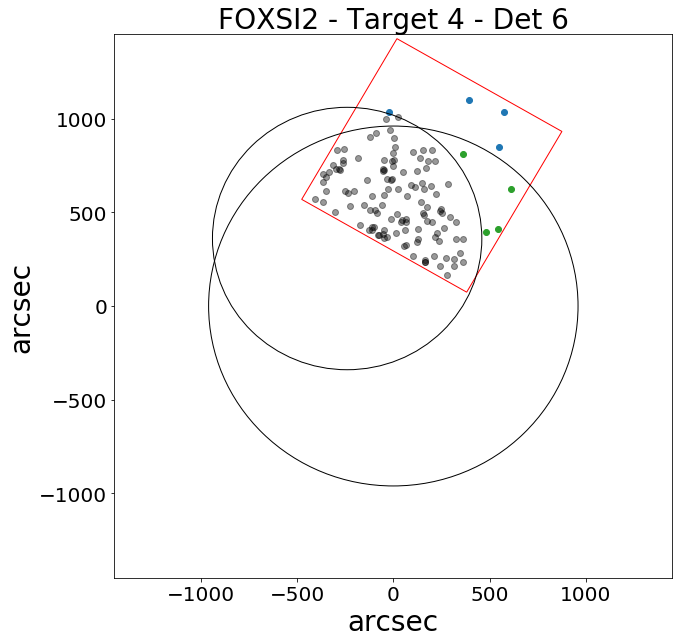

In [18]:
# Plotting
det = 6
fig, ax = plt.subplots(figsize=(10,10))
# ornaments
ax.set_xlim(-1450,1450)
ax.set_ylim(-1450,1450)
ax.set_xlabel('arcsec',fontsize=28)
ax.set_ylabel('arcsec',fontsize=28)
ax.tick_params(axis='both', labelsize=20)
ax.set_title('FOXSI2 - Target 4 - Det '+str(det),fontsize=28)
# Detector Area
# plt.scatter(Det6Area[0], Det6Area[1],marker='.',color='tab:grey')
# plt.scatter(Xnogr, Ynogr, marker='.',color='tab:green')
# plt.scatter(Xout, Yout, marker='.',color='tab:blue')
# plt.scatter(Xgr, Ygr, marker='.',color='tab:grey')
# FOXSI2 Data
ax.scatter(FXin,FYin,marker='o',color='tab:green',alpha=1.0)
ax.scatter(FXout,FYout,marker='o',color='tab:blue',alpha=1.)
ax.scatter(FXgr,FYgr,marker='o',color='black',alpha=0.4)
#D6 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[det]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(Dang[det]-135)) + 1)
rect = patches.Rectangle((T4x-l/2+mx,T4y-l/2+my),990,990,angle=Dang[det],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
solardisk = patches.Circle((0,0),radius= 960,fill=False);ax.add_patch(solardisk)
circ = patches.Circle((Xmask,Ymask),radius= Rmask,fill=False);ax.add_patch(circ)
plt.show()
fig.savefig('Area'+str(det)+'.png',bbox_inches='tight',dpi=300)
plt.close(fig)

In [19]:
# Printout Areas :
toarcsec = (990**2)/Det6Area[0].size
tocm = (.96**2)/Det6Area[0].size
# In arcsec^2
print('Mask Radius = {} arcsec'.format(Rmask))
print('Area inside solar disk (no ghost rays) : {0} arcsec^2 [green]'.
      format(round(Xnogr.size*toarcsec,1)))
print('Area outside solar disk (no ghost rays) : {0} arcsec^2 [blue]'.
      format(round(Xout.size*toarcsec,1)))
# In arcsec^2
print('Area inside solar disk (no ghost rays) : {0} cm^2 [green]'.
      format(round(Xnogr.size*tocm,4)))
print('Area outside solar disk (no ghost rays) : {0} cm^2 [blue]'.
      format(round(Xout.size*tocm,4)))
print('Events inside solar disk (no ghost rays) : {0} [green]'.
      format(FXin.size))
print('Events outside solar disk (no ghost rays) : {0} [blue]'.
      format(FXout.size))

Mask Radius = 700 arcsec
Area inside solar disk (no ghost rays) : 126464.5 arcsec^2 [green]
Area outside solar disk (no ghost rays) : 330439.5 arcsec^2 [blue]
Area inside solar disk (no ghost rays) : 0.1189 cm^2 [green]
Area outside solar disk (no ghost rays) : 0.3107 cm^2 [blue]
Events inside solar disk (no ghost rays) : 4 [green]
Events outside solar disk (no ghost rays) : 4 [blue]


In [20]:
AreaRatio = Xout.size/Xnogr.size
AreaRatio

2.6129032258064515

## Interpolate Effective Area for FOXSI-2
#### Given the position and energy of an event, return the respective Effective Area

In [21]:
from scipy import interpolate
import csv
import numpy as np

# EffArea Dir
EADir = './F2EffAreas/'
EAangles = np.insert(np.arange(-9,9+1,2),5,0)
EAenergies = [4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 11. , 13. , 15. , 17. , 19. , 22.5, 27.5]

def loadEA(det):
    mod = 0 if det == 6 else det
    # Read Eff Area Files
    EApanD  = csv.DictReader(open(EADir+'FOXSI2_Module_X-'+str(mod)+'_EA_pan.txt'),
                           fieldnames=EAangles) # Horizontal axis
    EAtiltD = csv.DictReader(open(EADir+'FOXSI2_Module_X-'+str(mod)+'_EA_tilt.txt'),
                           fieldnames=EAangles) # Vertical axis
    # Skip 4 lines of header
    _ = next(EApanD); _ = next(EApanD); _ = next(EApanD); _ = next(EApanD)
    _ = next(EAtiltD); _ = next(EAtiltD); _ = next(EAtiltD); _ = next(EAtiltD)
    # Save to a list :
    EApan, EAtilt = [], []
    for r in EApanD:
        EApan.append(list(r.values()))
    for r in EAtiltD:
        EAtilt.append(list(r.values()))
    # return as an array of floats
    return np.array(EApan).astype(np.float), np.array(EAtilt).astype(np.float)

def EAenergy(det, e_index, Pxi, Pyi) :
    EA6pan, EA6tilt = loadEA(det)
    EA6raw = np.concatenate((EA6pan[e_index], EA6tilt[e_index]))
    Xea = np.concatenate((EAangles,np.zeros(11)))
    Yea = np.concatenate((np.zeros(11),EAangles))
    EAe = interpolate.interp2d(Xea, Yea, EA6raw, kind='cubic')
    return float(EAe(Pxi,Pyi))

def EAi(det, E, Pxi, Pyi):
    '''  function that gives the effective area as function of the
            - detector
            - energy of the event
            - heliographic position (x,y) of the event
    '''
    Ei = 5.6 if E <= 5.6 else E
    idown = np.where(np.array(EAenergies) > Ei)[0] - 1
    iup   = np.where(np.array(EAenergies) < Ei)[0] + 1
    indices = []
    for i, j in [(i,j) for i in idown for j in iup] : 
        if i ==j : indices.append(i)
    return np.interp(Ei, (EAenergies[indices[0]], EAenergies[indices[1]]),
                     (EAenergy(det,indices[0],Pxi, Pyi), EAenergy(det,indices[1],Pxi, Pyi)))

In [22]:
# TEST: Let's suppose a position and energy for testsing
det, Ei, Pxi, Pyi = 6, 8.4, 5.5, -3.2 # det, keV, arcmin, arcmin
EAi(6, 5.6, 0, 0)

/Users/Kamilobu/opt/anaconda3/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=3,3 nx,ny=9,9 m=22 fp=0.588479 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/Users/Kamilobu/opt/anaconda3/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=3,3 nx,ny=9,9 m=22 fp=0.416289 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


23.728182022497506

### Get estimate for Averaged effective area inside the solar disk [green area]

In [23]:
EEs = np.linspace(5.01,10.,num=20,endpoint=True)
EEAA = []
for xx, yy in zip(Xnogr, Ynogr):
    for ee in EEs:
        EEAA.append( EAi(6, ee, (xx - T4x)/60, (yy - T4y)/60) )
print('The averaged Eff. Area inside the solar disk is {0} cm$-2$'.format(np.mean(EEAA)))

/Users/Kamilobu/opt/anaconda3/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=3,3 nx,ny=9,9 m=22 fp=0.370205 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/Users/Kamilobu/opt/anaconda3/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=3,3 nx,ny=9,9 m=22 fp=0.530075 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/Users/Kamilobu/opt/anaconda3/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data poin

The averaged Eff. Area inside the solar disk is 16.67303257227509 cm$-2$


## Livetime

In [65]:
# Read SAV LIVETIME given by Julie on April 23, 2020 :
flivetime = readsav(DataDir+'livetime_d6_target4_v2.sav')['ltime6_t4']
print('live time = 92.7s x {0}'.format(round(flivetime['frac'][0],3)))
print('live time = {0}s'.format(round(flivetime['total_livetime'][0]*1e-6,2)))

live time = 92.7s x 0.415
live time = 38.45s


## Flux estimate

In [24]:
# Deltas :
Delta_t = Trange6[1] - Trange6[0] if det == 6 else None
Delta_E = Erange[1] - Erange[0]

# Flux Inside the solar disk (no ghost-rays)
Flux_in = []
for ee, xx, yy in zip(EEin, FXin, FYin):
    Flux_in.append(1 / (Delta_t * Delta_E * EAi(det, ee, (xx - T4x)/60, (yy - T4y)/60)) )

# Flux Outside the solar disk (no ghost-rays)
Flux_out = []
for ee, xx, yy in zip(EEout, FXout, FYout):
    Flux_out.append(1 / (Delta_t * Delta_E * EAi(det, ee, (xx - T4x)/60, (yy - T4y)/60)) )

In [25]:
Flux_QS = (np.sum(Flux_in) - np.sum(Flux_out) * (Xnogr.size/Xout.size) ) \
            * np.pi*(.5*960)**2 / (Xnogr.size*toarcsec) # Scale to full sun to compare with Hannah (2010)
print('Quiet-Sun Flux : {0} s-1 cm-2 keV-1'.format(round(Flux_QS,5)))
print('R = {0} arcsec'.format(R10s))

Quiet-Sun Flux : 0.00201 s-1 cm-2 keV-1
R = 700 arcsec


## Iain Hannah Plot

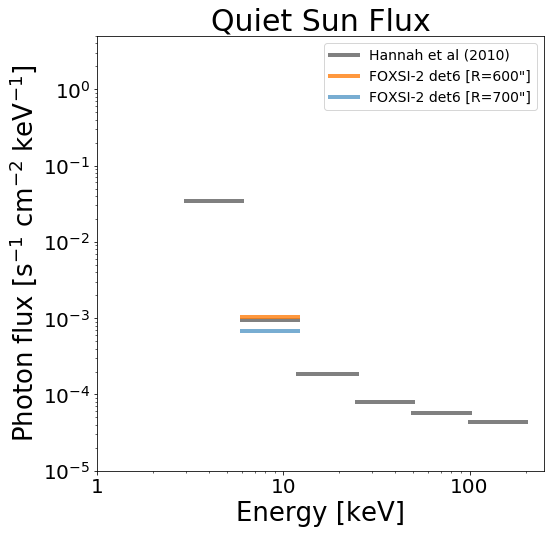

In [26]:
from matplotlib.ticker import ScalarFormatter
fig, ax = plt.subplots(figsize=(8,8))
# Iain's Data (2010) :
ax.plot([3,6],[340.38e-4,340.38e-4],linewidth=4.0,color='grey')
ax.plot([6,12],[9.5e-4,9.5e-4],linewidth=4.0,color='grey')
ax.plot([12,25],[1.88e-4,1.88e-4],linewidth=4.0,color='grey')
ax.plot([25,50],[0.8e-4,0.8e-4],linewidth=4.0,color='grey')
ax.plot([50,100],[0.58e-4,0.58e-4],linewidth=4.0,color='grey')
ax.plot([100,200],[0.44e-4,0.44e-4],linewidth=4.0,color='grey',label='Hannah et al (2010)')
# Det-6 FOXSI2
ax.plot([6,12],[10.4e-4,10.4e-4],linewidth=4.0,color='tab:orange',label='FOXSI-2 det6 [R=600"]',alpha=0.8,) # best
ax.plot([6,12],[6.8e-4,6.8e-4],linewidth=4.0,color='tab:blue',label='FOXSI-2 det6 [R=700"]',alpha=0.6) # worst
# ornaments
ax.set_xscale('log')
ax.set_yscale('log')
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_xlim(1,250)
ax.set_ylim(1e-5,5)
ax.set_xlabel('Energy [keV]',fontsize=26)
ax.set_ylabel('Photon flux [s$^{-1}$ cm$^{-2}$ keV$^{-1}$]',fontsize=26)
ax.tick_params(axis='both', labelsize=20)
ax.set_title('Quiet Sun Flux',fontsize=30)
ax.legend(fontsize=14)
plt.show()
fig.savefig('QS_Flux.pdf',bbox_inches='tight',dpi=300)
plt.close(fig)

## Error Analysis

Using a 2-sigma (0.9772 confidence) approach to fit Iain's papers. Following Gehrels (1986) we can create two arrays for the upper and lower limits.

In [27]:
lambda_up  = np.array([3.7883, 5.683, 7.348, 8.902, 10.39, 11.82, 13.22, 14.59])
lambda_low = np.array([0, 2.3e-2, 0.23, 0.569, 1.058, 1.583, 2.153, 2.758, ])

In [28]:
Up_QS = ( (lambda_up[len(Flux_in)]/len(Flux_in)) * np.sum(Flux_in) \
        - (lambda_low[len(Flux_out)]/len(Flux_out)) * np.sum(Flux_out) * (Xnogr.size/Xout.size) ) \
        * np.pi*(.5*960)**2 / (Xnogr.size*toarcsec)

Low_QS = ( (lambda_low[len(Flux_in)]/len(Flux_in)) * np.sum(Flux_in) \
        - (lambda_up[len(Flux_out)]/len(Flux_out)) * np.sum(Flux_out) * (Xnogr.size/Xout.size) ) \
        * np.pi*(.5*960)**2 / (Xnogr.size*toarcsec)

In [29]:
print('Upper Limit : {0} s-1 cm-2 keV-1'.format(round(Up_QS,5)))
print('Lower Limit : {0} s-1 cm-2 keV-1'.format(round(Low_QS,5)))
print('R = {0} arcsec'.format(R10s))

Upper Limit : 0.00809 s-1 cm-2 keV-1
Lower Limit : -0.00234 s-1 cm-2 keV-1
R = 700 arcsec


### Plot with errors

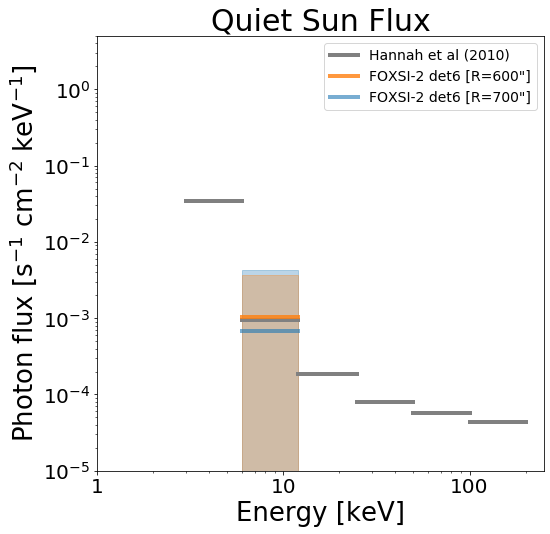

In [30]:
from matplotlib.ticker import ScalarFormatter
fig, ax = plt.subplots(figsize=(8,8))
# Iain's Data (2010) :
ax.plot([3,6],[340.38e-4,340.38e-4],linewidth=4.0,color='grey')
ax.plot([6,12],[9.5e-4,9.5e-4],linewidth=4.0,color='grey')
ax.plot([12,25],[1.88e-4,1.88e-4],linewidth=4.0,color='grey')
ax.plot([25,50],[0.8e-4,0.8e-4],linewidth=4.0,color='grey')
ax.plot([50,100],[0.58e-4,0.58e-4],linewidth=4.0,color='grey')
ax.plot([100,200],[0.44e-4,0.44e-4],linewidth=4.0,color='grey',label='Hannah et al (2010)')
# Erros Plot
ax.fill_between([6,12], 0, 42.4e-4,color='tab:blue',alpha=0.3)   # R10s = 700
ax.fill_between([6,12], 0, 36.7e-4,color='tab:orange',alpha=0.3) # R10s = 600
# Det-6 FOXSI2
ax.plot([6,12],[10.4e-4,10.4e-4],linewidth=4.0,color='tab:orange',label='FOXSI-2 det6 [R=600"]',alpha=0.8,) # best
ax.plot([6,12],[6.8e-4,6.8e-4],linewidth=4.0,color='tab:blue',label='FOXSI-2 det6 [R=700"]',alpha=0.6) # worst
# ornaments
ax.set_xscale('log')
ax.set_yscale('log')
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_xlim(1,250)
ax.set_ylim(1e-5,5)
ax.set_xlabel('Energy [keV]',fontsize=26)
ax.set_ylabel('Photon flux [s$^{-1}$ cm$^{-2}$ keV$^{-1}$]',fontsize=26)
ax.tick_params(axis='both', labelsize=20)
ax.set_title('Quiet Sun Flux',fontsize=30)
ax.legend(fontsize=14)
plt.show()
fig.savefig('QS_Flux_Errors.pdf',bbox_inches='tight',dpi=300)
plt.close(fig)